Analysis Car Accident Severity at Seattle  
==============  

This notebook describe snalysis of car accident severity at seattle.

#  Introduction/Business Problem  
In this report, we will analyze the relationship between the severity of a collision and the situation from the data of a car crash in Seattle.  
By clarifying the factors that lead to more serious accidents, we provide the following information.  

- Presenting drivers with factors to keep in mind to avoid serious accidents  
- Presenting to road managers factors to take useful measures to prevent serious accidents  



# Data  
In this report use "Collisions—All Years" data, provide by SDOT Traffic Management Division, Traffic Records Group.  
This data provide all types of collisions information, occurred from 2004 to Present.  
This data include severity of collisions and collision information, ex: road condition, light condition, jucntion type, and so on.

# Methodology  
First, I create Decision Tree model using scikit-learn library. 
Next, I try to get feature importance from trained model. 
Feature importance indicates the importance of the factors that determine the severity of the collision. So, by analyzing the factors with high feature importance, it is possible to consider measures to suppress the occurrence of collision accidents and reduce their severity.

## Explore Data Analysis  

In [1]:
# import necessary libaries
import numpy as np
import pandas as pd
from sklearn import tree

%matplotlib inline
import matplotlib.pyplot as plt



In [2]:
# Load data
src_df = pd.read_csv(filepath_or_buffer='Data-Collisions.csv')

C:\Users\nubat\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Show first few data 
src_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
# Show data information
src_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [5]:
for column_name in src_df.columns:
    print("column:{:20} unique:{:7}".format(column_name, src_df[column_name].unique().size))

column:SEVERITYCODE         unique:      2
column:X                    unique:  23564
column:Y                    unique:  23840
column:OBJECTID             unique: 194673
column:INCKEY               unique: 194673
column:COLDETKEY            unique: 194673
column:REPORTNO             unique: 194670
column:STATUS               unique:      2
column:ADDRTYPE             unique:      4
column:INTKEY               unique:   7615
column:LOCATION             unique:  24103
column:EXCEPTRSNCODE        unique:      3
column:EXCEPTRSNDESC        unique:      2
column:SEVERITYCODE.1       unique:      2
column:SEVERITYDESC         unique:      2
column:COLLISIONTYPE        unique:     11
column:PERSONCOUNT          unique:     47
column:PEDCOUNT             unique:      7
column:PEDCYLCOUNT          unique:      3
column:VEHCOUNT             unique:     13
column:INCDATE              unique:   5985
column:INCDTTM              unique: 162058
column:JUNCTIONTYPE         unique:      8
column:SDOT

## Data selection for create model  
I select following data.  

Use the following data as the objective variable.  

- SEVERITYCODE  

Use the following variables as explanatory variables.  

- STATUS
- ADDRTYPE
- COLLISIONTYPE
- INCDTTM
- JUNCTIONTYPE
- INATTENTIONIND
- UNDERINFL
- WEATHER
- ROADCOND
- LIGHTCOND
- PEDROWNOTGRNT
- SPEEDING
- HITPARKEDCAR  

My selection rule is as follows.  

- There are few data variations  
- Related to the cause of the collision
  
Next, check each data.

['Matched' 'Unmatched']


<ipython-input-6-4b8c8fb1adfe>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


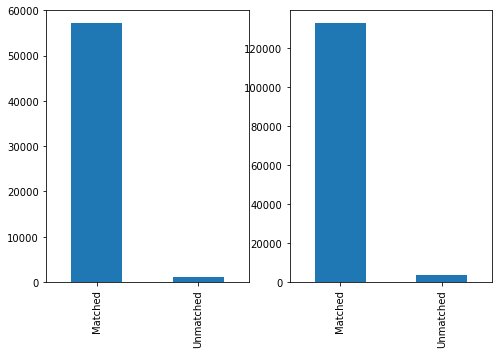

In [6]:
# Check STATUS 
print(src_df['STATUS'].unique())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
src_df.query('SEVERITYCODE==2')['STATUS'].value_counts().plot(kind='bar', ax=axes[0])
src_df.query('SEVERITYCODE!=2')['STATUS'].value_counts().plot(kind='bar', ax=axes[1])
fig.show()

['Intersection' 'Block' 'Alley' nan]


<ipython-input-7-b2065c2c6317>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


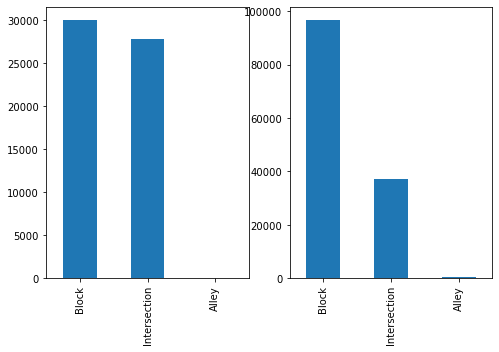

In [7]:
# Check ADDRTYPE
print(src_df['ADDRTYPE'].unique())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
src_df.query('SEVERITYCODE==2')['ADDRTYPE'].value_counts().plot(kind='bar', ax=axes[0])
src_df.query('SEVERITYCODE!=2')['ADDRTYPE'].value_counts().plot(kind='bar', ax=axes[1])
fig.show()

['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 nan 'Left Turn' 'Pedestrian' 'Right Turn']


<ipython-input-8-19449a4cabd5>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


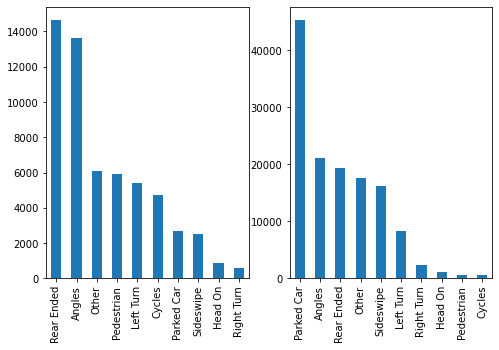

In [8]:
# Check COLLISIONTYPE
print(src_df['COLLISIONTYPE'].unique())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
src_df.query('SEVERITYCODE==2')['COLLISIONTYPE'].value_counts().plot(kind='bar', ax=axes[0])
src_df.query('SEVERITYCODE!=2')['COLLISIONTYPE'].value_counts().plot(kind='bar', ax=axes[1])
fig.show()

In [9]:
# Check INCDTTM
print(src_df['INCDTTM'].unique())

['3/27/2013 2:54:00 PM' '12/20/2006 6:55:00 PM' '11/18/2004 10:20:00 AM'
 ... '1/19/2019 9:25:00 AM' '1/15/2019 4:48:00 PM' '11/30/2018 3:45:00 PM']


['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'Mid-Block (but intersection related)'
 'At Intersection (but not related to intersection)' nan 'Unknown'
 'Ramp Junction']


<ipython-input-10-6deb80347ba9>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


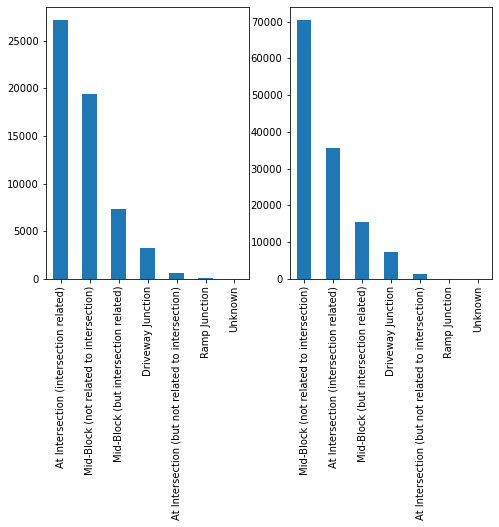

In [10]:
# Check JUNCTIONTYPE
print(src_df['JUNCTIONTYPE'].unique())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
src_df.query('SEVERITYCODE==2')['JUNCTIONTYPE'].value_counts().plot(kind='bar', ax=axes[0])
src_df.query('SEVERITYCODE!=2')['JUNCTIONTYPE'].value_counts().plot(kind='bar', ax=axes[1])
fig.show()

[nan 'Y']


<ipython-input-11-e30cc4ffccce>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


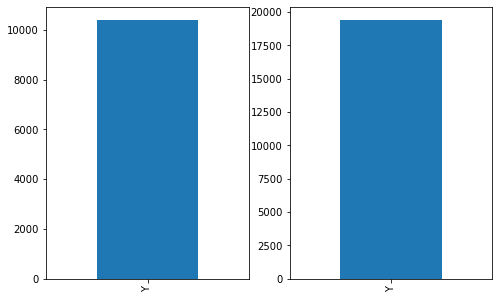

In [11]:
# Check INATTENTIONIND
print(src_df['INATTENTIONIND'].unique())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
src_df.query('SEVERITYCODE==2')['INATTENTIONIND'].value_counts().plot(kind='bar', ax=axes[0])
src_df.query('SEVERITYCODE!=2')['INATTENTIONIND'].value_counts().plot(kind='bar', ax=axes[1])
fig.show()

<ipython-input-12-16931411a3e1>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


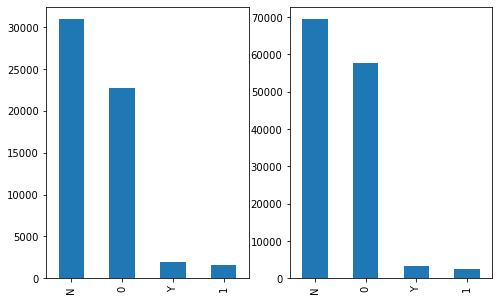

In [12]:
# Check UNDERINFL
src_df['UNDERINFL'].unique()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
src_df.query('SEVERITYCODE==2')['UNDERINFL'].value_counts().plot(kind='bar', ax=axes[0])
src_df.query('SEVERITYCODE!=2')['UNDERINFL'].value_counts().plot(kind='bar', ax=axes[1])
fig.show()

['Overcast' 'Raining' 'Clear' nan 'Unknown' 'Other' 'Snowing'
 'Fog/Smog/Smoke' 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt'
 'Severe Crosswind' 'Partly Cloudy']


<ipython-input-13-a18d794a2297>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


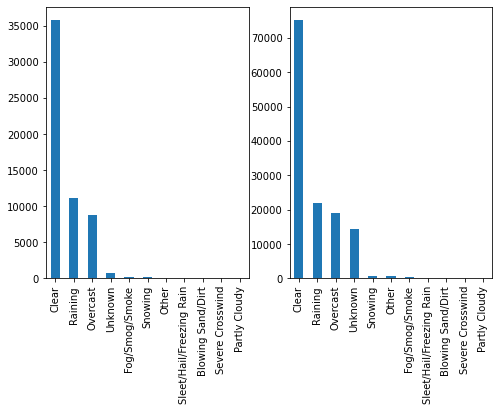

In [13]:
# Check WEATHER
print(src_df['WEATHER'].unique())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
src_df.query('SEVERITYCODE==2')['WEATHER'].value_counts().plot(kind='bar', ax=axes[0])
src_df.query('SEVERITYCODE!=2')['WEATHER'].value_counts().plot(kind='bar', ax=axes[1])
fig.show()

['Wet' 'Dry' nan 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']


<ipython-input-14-59e910eb6067>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


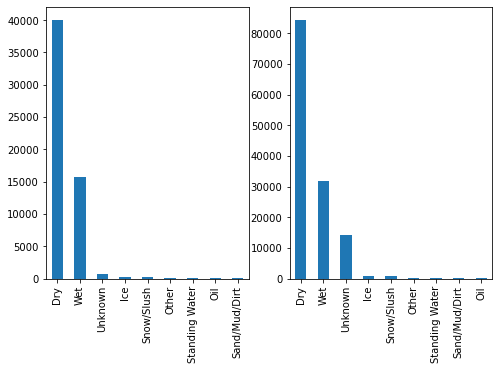

In [14]:
# Check ROADCOND
print(src_df['ROADCOND'].unique())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
src_df.query('SEVERITYCODE==2')['ROADCOND'].value_counts().plot(kind='bar', ax=axes[0])
src_df.query('SEVERITYCODE!=2')['ROADCOND'].value_counts().plot(kind='bar', ax=axes[1])
fig.show()

['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' nan
 'Unknown' 'Dusk' 'Dawn' 'Dark - Street Lights Off' 'Other'
 'Dark - Unknown Lighting']


<ipython-input-15-504b5ca24703>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


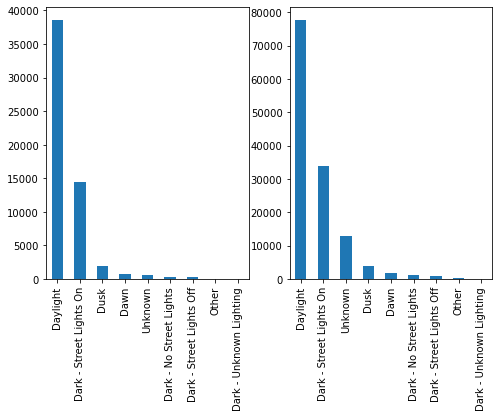

In [15]:
# Check LIGHTCOND
print(src_df['LIGHTCOND'].unique())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
src_df.query('SEVERITYCODE==2')['LIGHTCOND'].value_counts().plot(kind='bar', ax=axes[0])
src_df.query('SEVERITYCODE!=2')['LIGHTCOND'].value_counts().plot(kind='bar', ax=axes[1])
fig.show()

[nan 'Y']


<ipython-input-16-c5f4527a4b01>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


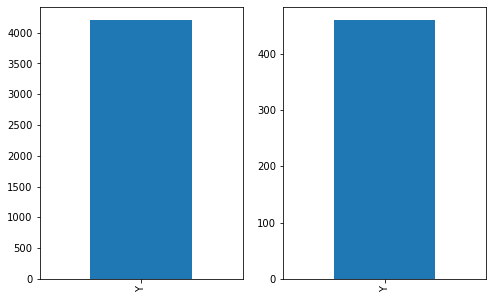

In [16]:
# Check PEDROWNOTGRNT
print(src_df['PEDROWNOTGRNT'].unique())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
src_df.query('SEVERITYCODE==2')['PEDROWNOTGRNT'].value_counts().plot(kind='bar', ax=axes[0])
src_df.query('SEVERITYCODE!=2')['PEDROWNOTGRNT'].value_counts().plot(kind='bar', ax=axes[1])
fig.show()

[nan 'Y']


<ipython-input-17-abf4e1ad4b75>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


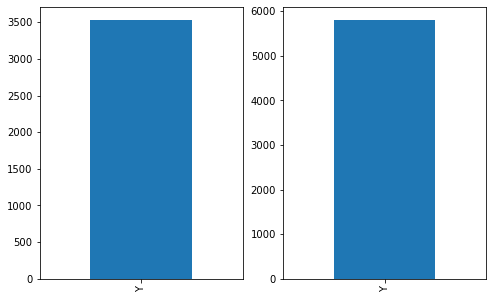

In [17]:
# Check SPEEDING
print(src_df['SPEEDING'].unique())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
src_df.query('SEVERITYCODE==2')['SPEEDING'].value_counts().plot(kind='bar', ax=axes[0])
src_df.query('SEVERITYCODE!=2')['SPEEDING'].value_counts().plot(kind='bar', ax=axes[1])
fig.show()

['N' 'Y']


<ipython-input-18-1f805862e2f5>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


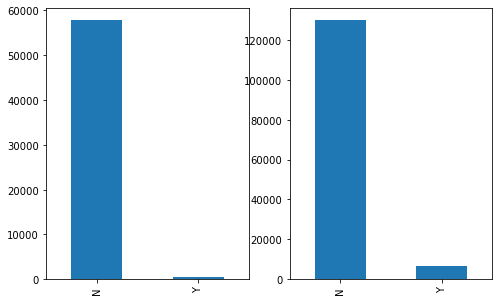

In [18]:
# Check HITPARKEDCAR
print(src_df['HITPARKEDCAR'].unique())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
src_df.query('SEVERITYCODE==2')['HITPARKEDCAR'].value_counts().plot(kind='bar', ax=axes[0])
src_df.query('SEVERITYCODE!=2')['HITPARKEDCAR'].value_counts().plot(kind='bar', ax=axes[1])
fig.show()

## Data preparation  
The following processing is performed as data preprocessing.  

- Convert categorical variable into dummy/indicator variables.  
- Convert date time value to categorical data.  

### Convet to dummy/indicator variables  
Follwing features convert to dummy/indicator variables.  

- STATUS
- ADDRTYPE
- COLLISIONTYPE
- INCDTTM
- JUNCTIONTYPE
- INATTENTIONIND
- UNDERINFL
- WEATHER
- ROADCOND
- LIGHTCOND
- PEDROWNOTGRNT
- SPEEDING
- HITPARKEDCAR  

### Convert date time variables  
The date and time information is not useful as it is.
Information about whether the accident occurred on weekdays or holidays, daytime or nighttime is useful.
Therefore, we take the above information from the date and time information and use it as an explanatory variable.


In [19]:
to_dummy_columns = [
    'STATUS',
    'ADDRTYPE',
    'COLLISIONTYPE',
    'JUNCTIONTYPE',
    'INATTENTIONIND',
    'UNDERINFL',
    'WEATHER',
    'ROADCOND',
    'LIGHTCOND',
    'PEDROWNOTGRNT',
    'SPEEDING',
    'HITPARKEDCAR', 
    'INCDTTM_WEEK',
    'INCDTTM_HOUR',
]
drop_columns = [
    'X',
    'Y',
    'OBJECTID',
    'INCKEY',
    'COLDETKEY',
    'REPORTNO',
    'INTKEY',
    'LOCATION',
    'EXCEPTRSNCODE',
    'EXCEPTRSNDESC',
    'SEVERITYCODE.1',
    'SEVERITYDESC',
    'PERSONCOUNT',
    'PEDCOUNT',
    'PEDCYLCOUNT',
    'VEHCOUNT',
    'INCDATE',
    'INCDTTM',
    'SDOT_COLCODE',
    'SDOT_COLDESC',
    'SDOTCOLNUM',
    'ST_COLCODE',
    'ST_COLDESC',
    'SEGLANEKEY',
    'CROSSWALKKEY',
]


In [20]:
# Convert INCDTTM datatype, object to timestamp 
src_df['INCDTTM'] = pd.to_datetime(src_df['INCDTTM'])  
src_df['INCDTTM_WEEK'] = src_df['INCDTTM'].dt.dayofweek
src_df['INCDTTM_HOUR'] = src_df['INCDTTM'].dt.hour

In [21]:
src_df['INCDTTM_WEEK']
src_df['INCDTTM_HOUR']

0         14
1         18
2         10
3          9
4          8
          ..
194668     8
194669     9
194670     9
194671    16
194672    15
Name: INCDTTM_HOUR, Length: 194673, dtype: int64

In [22]:
# Convert to dummy values 
dummied_df = pd.get_dummies(src_df, columns=to_dummy_columns)
dummied_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,INTKEY,LOCATION,EXCEPTRSNCODE,...,INCDTTM_HOUR_14,INCDTTM_HOUR_15,INCDTTM_HOUR_16,INCDTTM_HOUR_17,INCDTTM_HOUR_18,INCDTTM_HOUR_19,INCDTTM_HOUR_20,INCDTTM_HOUR_21,INCDTTM_HOUR_22,INCDTTM_HOUR_23
0,2,-122.323148,47.703140,1,1307,1307,3502005,37475.0,5TH AVE NE AND NE 103RD ST,,...,1,0,0,0,0,0,0,0,0,0
1,1,-122.347294,47.647172,2,52200,52200,2607959,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,...,0,0,0,0,1,0,0,0,0,0
2,1,-122.334540,47.607871,3,26700,26700,1482393,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1,-122.334803,47.604803,4,1144,1144,3503937,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,...,0,0,0,0,0,0,0,0,0,0
4,2,-122.306426,47.545739,5,17700,17700,1807429,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Drop unnecessary columns 
prepared_df = dummied_df.drop(columns=drop_columns)
prepared_df.head()

,SEVERITYCODE,STATUS_Matched,STATUS_Unmatched,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,...,INCDTTM_HOUR_14,INCDTTM_HOUR_15,INCDTTM_HOUR_16,INCDTTM_HOUR_17,INCDTTM_HOUR_18,INCDTTM_HOUR_19,INCDTTM_HOUR_20,INCDTTM_HOUR_21,INCDTTM_HOUR_22,INCDTTM_HOUR_23
0,2,1,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
prepared_df.iloc[:,1:]

,STATUS_Matched,STATUS_Unmatched,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,...,INCDTTM_HOUR_14,INCDTTM_HOUR_15,INCDTTM_HOUR_16,INCDTTM_HOUR_17,INCDTTM_HOUR_18,INCDTTM_HOUR_19,INCDTTM_HOUR_20,INCDTTM_HOUR_21,INCDTTM_HOUR_22,INCDTTM_HOUR_23
0,1,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
194669,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194670,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
194671,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Create model  
Create a model of Decision Tree using the prepared data. All data is used as training data because the purpose is to get the importance of the feature.  
After building the model, get the feature importance and analyze the features that are of high importance to the prediction.

In [25]:
# Create model
classifier = tree.DecisionTreeClassifier()
X_train = prepared_df.iloc[:,1:]
y_train = prepared_df.iloc[:,0]
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

## Get featue importance  
Get featue importance and check importance order.

In [26]:
# Get feature importance
feature_importance_df = pd.DataFrame(classifier.feature_importances_, index=prepared_df.columns[1:], columns=['importance'])
feature_importance_df.head()

,importance
STATUS_Matched,0.000003
STATUS_Unmatched,0.008365
ADDRTYPE_Alley,0.000777
ADDRTYPE_Block,0.005671
ADDRTYPE_Intersection,0.004208


In [27]:
# Sort decending and get first 20 important features
feature_importance_df.sort_values(by='importance', ascending=False).head(30)

,importance
COLLISIONTYPE_Parked Car,0.185218
COLLISIONTYPE_Pedestrian,0.091751
COLLISIONTYPE_Cycles,0.075349
COLLISIONTYPE_Sideswipe,0.041698
WEATHER_Overcast,0.021309
WEATHER_Clear,0.020683
INCDTTM_WEEK_2,0.020117
INATTENTIONIND_Y,0.019965
INCDTTM_WEEK_3,0.019956
INCDTTM_WEEK_1,0.019444


# Result  
From EDA and featue importance, the following hypotheses are inferred from the importance.  

- The following factors occupy a high proportion in determining importance
  - Weather
  - Collision type
  - Weekday or Holiday
  - Inattention or not
  - Road condition (Wet or dry)
  - Under the influence of drugs or alcohol
  - The following measures may lead to the suppression of serious accidents.
  - Calling attention according to road surface conditions and weather
  - Enlightenment of the effects of drugs and alcohol
- From the Collision type, there are many accidents involving stopped vehicles regardless of the severity. Creating a method to identify parked vehicles at an early stage may lead to the suppression of the entire accident.

# Discussion 
In the data used this time, there was no driving information (investigation status such as speed, brakes, steering, etc.) at the time of collision.  
I think the existence of this information can be an important element in the factor analysis of collision accidents.  
Also, if you can obtain information on different regions with the same explanatory variables as this time, you can analyze the difference in the importance of factors in each region. This could also be an interesting subject of analysis.

# Conclusion 
In this report, we used machine learning to analyze what factors have a significant impact on our determination of importance, based on data from car accidents in Seattle.  
From the data used, we selected data that could lead to the acceptance of the accident decision, and calculated the importance using the Decision Tree.  
How to use such a model is a method that can be widely used when narrowing down the explanatory variables that should be focused on in data consisting of many explanatory variables. It's a technique I often see in the EDA phase, even in the kaggle competition I'm in.
This time, I used Decision Tree, but you can also use various models of Gradient Tree Boosting (XGBoost, LightGBM) and Random Forest.
We hope it will help you analyze your data in the future.  